<a href="https://colab.research.google.com/github/Thipwadee/Project2/blob/main/principal_component_analysis_V_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'
from sklearn.model_selection import cross_val_score, train_test_split, KFold, StratifiedKFold
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from pandas.api.types import  CategoricalDtype


# machine learning model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression


In [2]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_excel('/content/drive/My Drive/Paper/Data-Survey-13-7-2023.xlsx', skiprows = 1)
data

In [16]:
data = pd.read_excel('/content/Cleaned_Thermal_Data.xlsx', sheet_name='sheet_2', usecols=lambda x: 'Unnamed' not in x,)
data

,Age,BMI,Temp,RH,V,Thermal_acceptance,Thermal_sensation_Vote,อุณหภูมิ,ความชื้น,กระแสลม,...,Clo,Met,พื้นที่ทำแบบสอบถาม_ภายนอก / ใต้ร่มไม้,พื้นที่ทำแบบสอบถาม_ภายนอก/ กลางแจ้ง,พื้นที่ทำแบบสอบถาม_ภายนอก/ มีหลังคาคลุม,พื้นที่ทำแบบสอบถาม_ภายใต้อาคาร,seasons_summer,seasons_winter,เพศ_ชาย,เพศ_หญิง
0,27,17.156262,30.5,42.9,0.13,Accept,0,2,1,2,...,0.55,1.2,0,0,1,0,0,1,1,0
1,36,23.183673,30.5,42.9,0.13,Accept,-1,3,0,5,...,0.55,1.2,0,0,1,0,0,1,1,0
2,25,38.019565,30.5,42.9,0.13,Accept,-1,2,0,4,...,0.55,1.2,0,0,1,0,0,1,0,1
3,29,27.548209,30.5,42.9,0.13,Accept,-1,3,3,4,...,0.55,1.2,0,0,1,0,0,1,1,0
4,28,33.744173,30.5,42.9,0.13,Accept,-1,2,1,4,...,0.55,1.2,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,37,27.160494,35.6,46.5,0.40,Accept,0,3,2,4,...,0.55,1.2,0,0,0,1,1,0,1,0
189,23,18.591037,35.6,46.5,0.40,Unaccept,0,3,1,4,...,0.55,1.2,0,0,0,1,1,0,0,1
190,27,16.456006,35.6,46.5,0.40,Accept,1,4,4,4,...,0.55,1.2,0,0,0,1,1,0,1,0
191,57,23.255019,35.6,46.5,0.40,Accept,1,3,1,5,...,0.55,1.2,0,0,0,1,1,0,1,0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Age                                      193 non-null    int64  
 1   BMI                                      193 non-null    float64
 2   Temp                                     193 non-null    float64
 3   RH                                       193 non-null    float64
 4   V                                        193 non-null    float64
 5   Thermal_acceptance                       193 non-null    object 
 6   Thermal_sensation_Vote                   193 non-null    int64  
 7   อุณหภูมิ                                 193 non-null    int64  
 8   ความชื้น                                 193 non-null    int64  
 9   กระแสลม                                  193 non-null    int64  
 10  ความแรงของแสงแดด                         193 non-n

In [18]:
data.rename(columns = {'อุณหภูมิ' : 'ความรู้สึกถึงความร้อน', 'ความชื้น':'ความรู้สึกถึงความชื้น','กระแสลม':'ความรู้สึกถึงกระแสมลม','ความแรงของแสงแดด':'ความรู้สึกถึงแสงแดด','เหงื่อบริเวณผิวหนัง':'ความรู้สึกถึงเหงื่อบริเวณผิวหนัง'
                       ,'ความร้อน':'ต้องการความร้อน','ความชื้น.1':'ต้องการความชื้น','กระแสลม.1':'ต้องการกระแสลม','แสงแดด':'ต้องการแสงแดด','เหงื่อบริเวณผิวหนัง.1':'ต้องการเหงื่อบริเวณผิวหนัง'
                       }, inplace = True)
df_encoded

,Age,BMI,Temp,RH,V,Thermal_acceptance,Thermal_sensation_Vote,ความรู้สึกถึงความร้อน,ความรู้สึกถึงความชื้น,ความรู้สึกถึงกระแสมลม,...,Clo,Met,พื้นที่ทำแบบสอบถาม_ภายนอก / ใต้ร่มไม้,พื้นที่ทำแบบสอบถาม_ภายนอก/ กลางแจ้ง,พื้นที่ทำแบบสอบถาม_ภายนอก/ มีหลังคาคลุม,พื้นที่ทำแบบสอบถาม_ภายใต้อาคาร,seasons_summer,seasons_winter,เพศ_ชาย,เพศ_หญิง
0,27,17.156262,30.5,42.9,0.13,Accept,0,2,1,2,...,0.55,1.2,0,0,1,0,0,1,1,0
1,36,23.183673,30.5,42.9,0.13,Accept,-1,3,0,5,...,0.55,1.2,0,0,1,0,0,1,1,0
2,25,38.019565,30.5,42.9,0.13,Accept,-1,2,0,4,...,0.55,1.2,0,0,1,0,0,1,0,1
3,29,27.548209,30.5,42.9,0.13,Accept,-1,3,3,4,...,0.55,1.2,0,0,1,0,0,1,1,0
4,28,33.744173,30.5,42.9,0.13,Accept,-1,2,1,4,...,0.55,1.2,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,37,27.160494,35.6,46.5,0.40,Accept,0,3,2,4,...,0.55,1.2,0,0,0,1,1,0,1,0
189,23,18.591037,35.6,46.5,0.40,Unaccept,0,3,1,4,...,0.55,1.2,0,0,0,1,1,0,0,1
190,27,16.456006,35.6,46.5,0.40,Accept,1,4,4,4,...,0.55,1.2,0,0,0,1,1,0,1,0
191,57,23.255019,35.6,46.5,0.40,Accept,1,3,1,5,...,0.55,1.2,0,0,0,1,1,0,1,0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Age                                      193 non-null    int64  
 1   BMI                                      193 non-null    float64
 2   Temp                                     193 non-null    float64
 3   RH                                       193 non-null    float64
 4   V                                        193 non-null    float64
 5   Thermal_acceptance                       193 non-null    object 
 6   Thermal_sensation_Vote                   193 non-null    int64  
 7   ความรู้สึกถึงความร้อน                    193 non-null    int64  
 8   ความรู้สึกถึงความชื้น                    193 non-null    int64  
 9   ความรู้สึกถึงกระแสมลม                    193 non-null    int64  
 10  ความรู้สึกถึงแสงแดด                      193 non-n

#ดูความสัมพันธ์

In [21]:
cols = ['เพศ_ชาย','เพศ_หญิง','Age', 'BMI', 'Temp', 'RH', 'V', 'TMRT','พื้นที่ทำแบบสอบถาม_ภายนอก / ใต้ร่มไม้'
        ,'พื้นที่ทำแบบสอบถาม_ภายนอก/ กลางแจ้ง','พื้นที่ทำแบบสอบถาม_ภายนอก/ มีหลังคาคลุม','พื้นที่ทำแบบสอบถาม_ภายใต้อาคาร'
        ,'seasons_summer','seasons_winter','ความรู้สึกถึงความร้อน','ความรู้สึกถึงความชื้น','ความรู้สึกถึงกระแสมลม', 'ความรู้สึกถึงแสงแดด'
        ,'ความรู้สึกถึงเหงื่อบริเวณผิวหนัง','ต้องการความร้อน','ต้องการความชื้น','ต้องการกระแสลม','ต้องการแสงแดด','ต้องการเหงื่อบริเวณผิวหนัง']

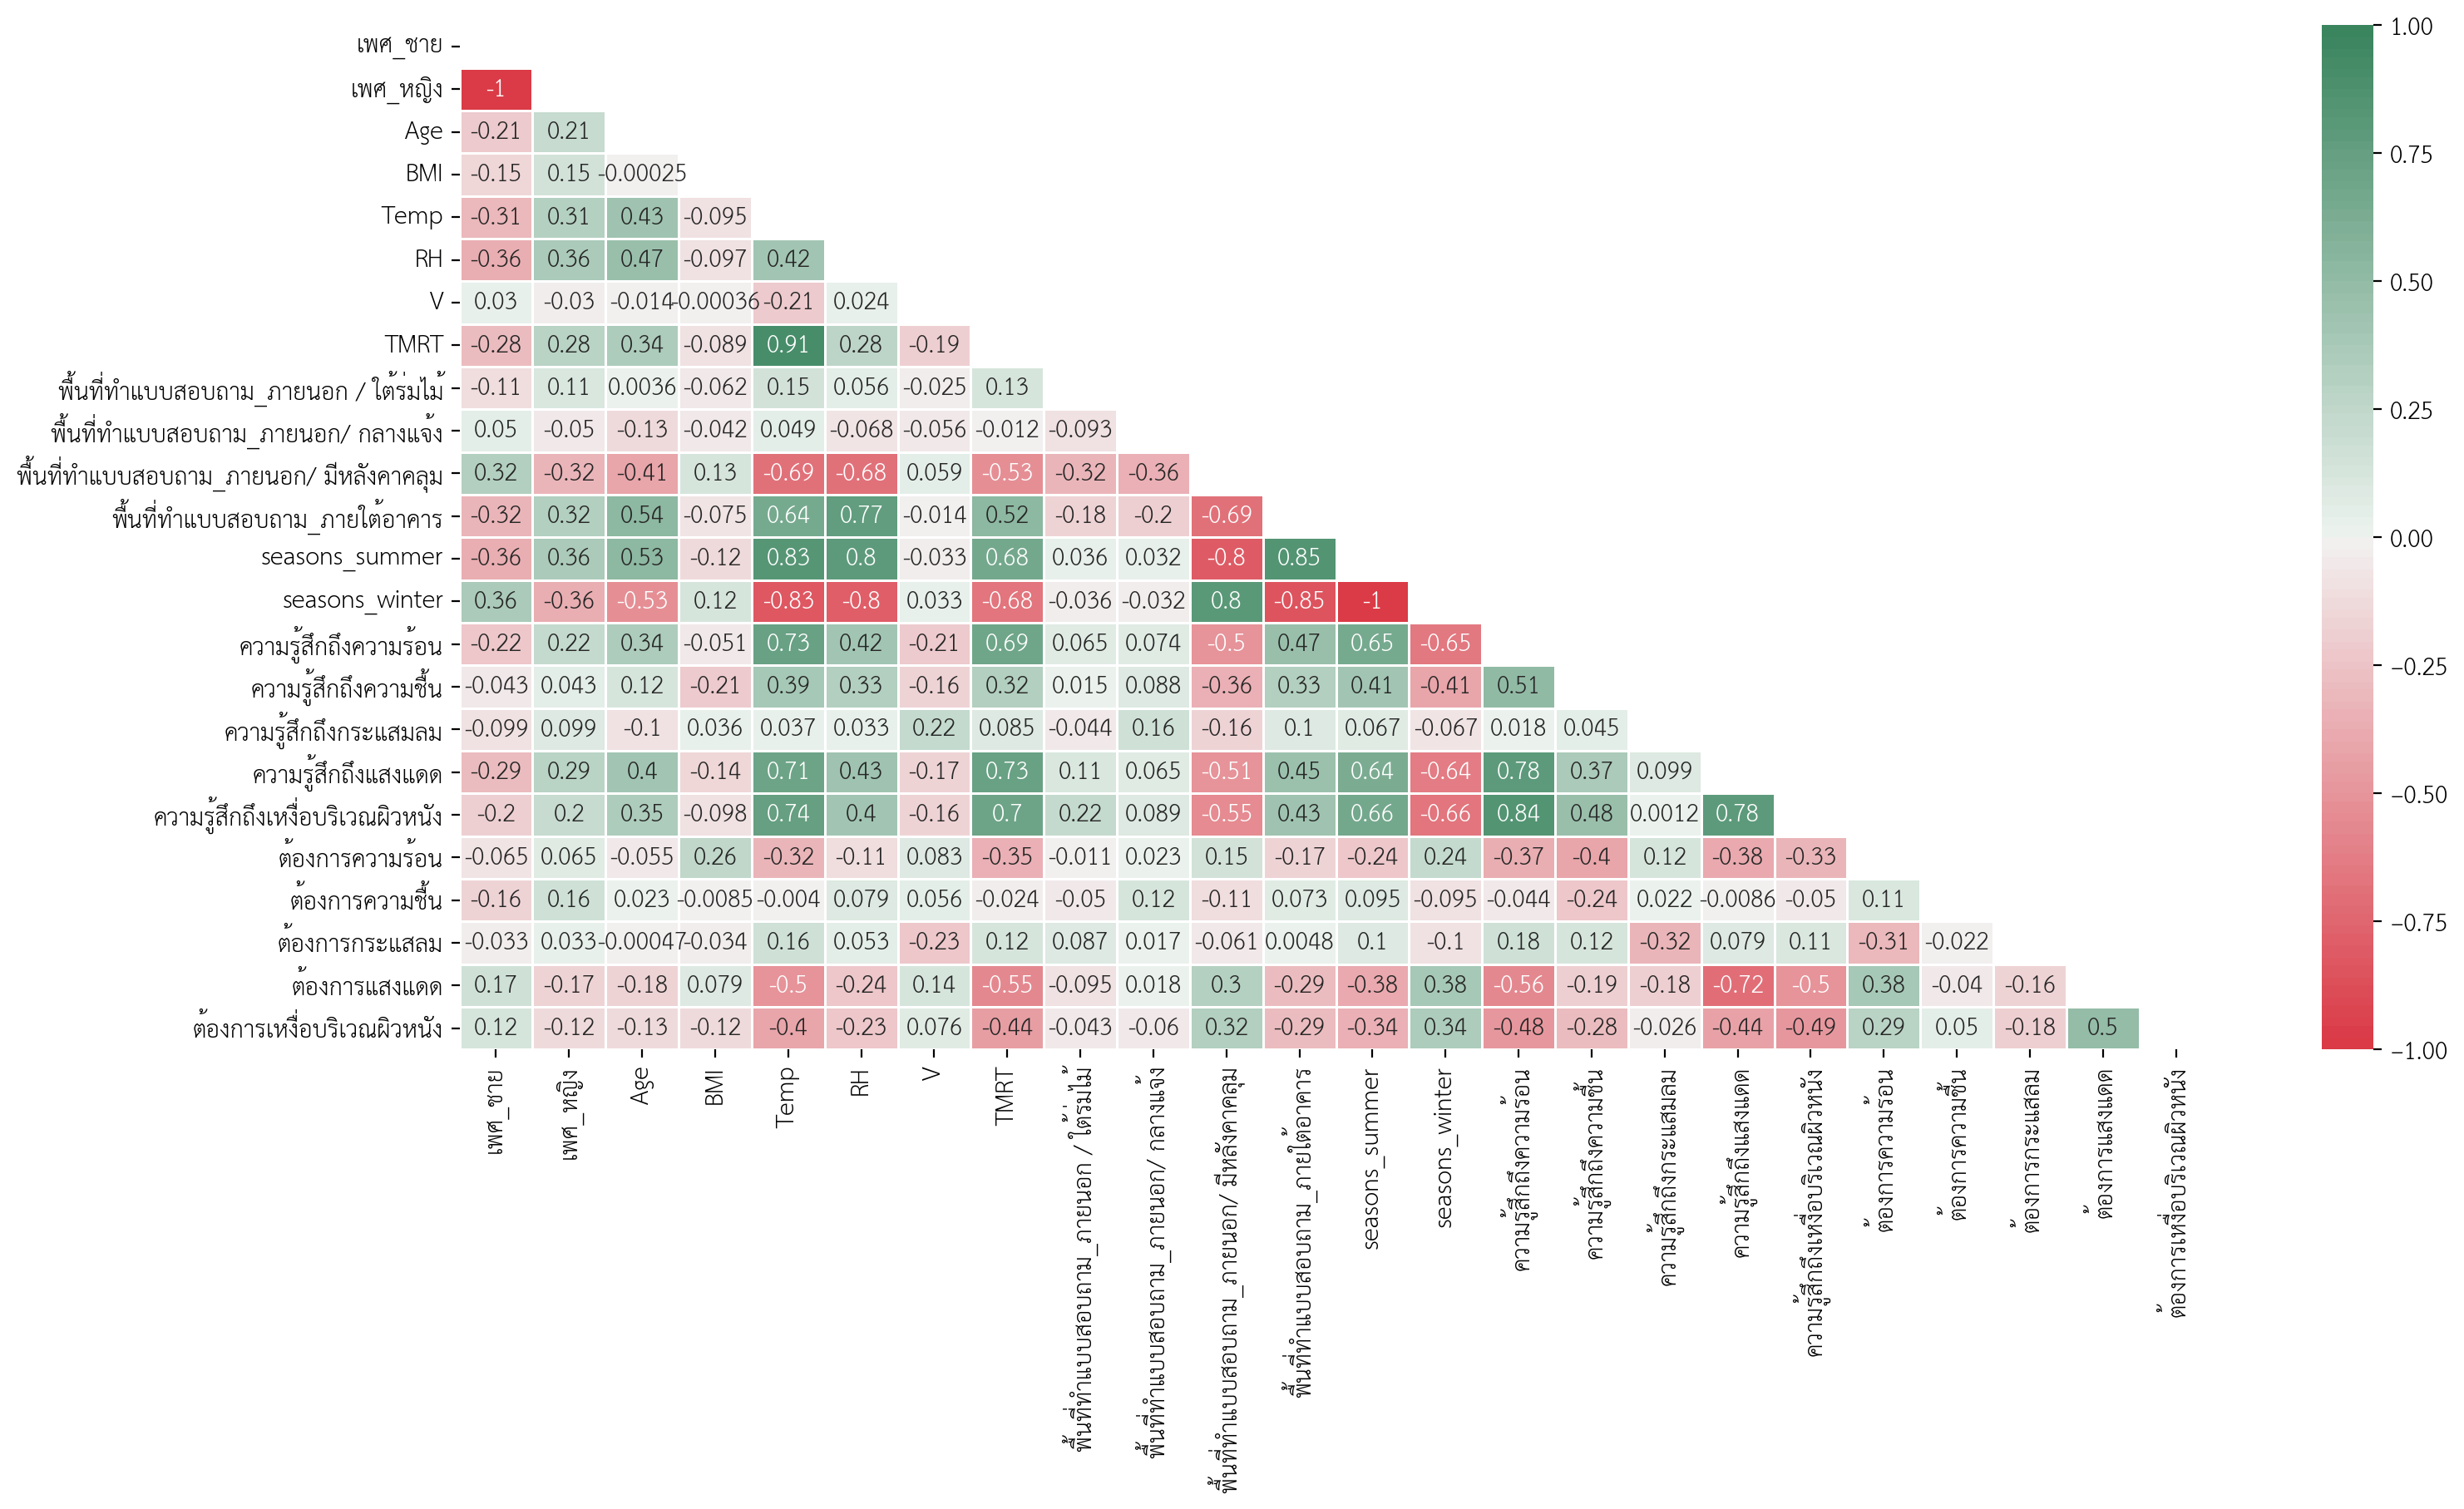

In [22]:
dcorr=data[cols].corr()
# dcorr

mask = np.zeros_like(dcorr)
# mask.shape
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(17,8))
sns.heatmap(dcorr, cmap=sns.diverging_palette(10, 145, n=100),
            vmin=-1, vmax=1, center=0, linewidths=1, annot=True, mask=mask, ax=ax);

#Spitt Data

In [23]:
# Define the feature matrix X and the target y

X=data[cols]
y = data['Thermal_acceptance']
y2 = data['Thermal_sensation_Vote']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, y2_train, y2_test = train_test_split(X, y,y2, test_size=0.3, random_state=42)

#PCA

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [25]:
#Scale Data โดย Standardization
scaler = StandardScaler()
X_t = scaler.fit_transform(X)

In [26]:
X_t.shape

(193, 24)

In [27]:
pca = PCA(n_components=X_t.shape[1])
#pca = PCA(n_components=)

pca.fit_transform(X_t)
print(f'explained_variance (n_components={pca.n_components}) = {pca.explained_variance_}') # Eigenvalues
print(f'explained_variance_ratio (n_components={pca.n_components}) = {pca.explained_variance_ratio_}')
print(f'sum explained_variance_ratio = {np.sum(pca.explained_variance_ratio_)}')

explained_variance (n_components=24) = [8.63410780e+00 2.45908483e+00 1.71204707e+00 1.53529459e+00
 1.30049537e+00 1.16411236e+00 1.07970168e+00 1.05549646e+00
 9.35862679e-01 7.09594061e-01 6.58223391e-01 6.19354754e-01
 5.25235103e-01 4.97046620e-01 4.33089515e-01 2.78515490e-01
 1.58175922e-01 1.32916102e-01 1.24519782e-01 8.94488179e-02
 2.26776026e-02 3.36056280e-31 3.28326550e-32 6.31345903e-34]
explained_variance_ratio (n_components=24) = [3.57890479e-01 1.01930977e-01 7.09656817e-02 6.36391539e-02
 5.39065437e-02 4.82533621e-02 4.47544737e-02 4.37511486e-02
 3.87922354e-02 2.94132253e-02 2.72838711e-02 2.56727359e-02
 2.17714033e-02 2.06029687e-02 1.79518970e-02 1.15446835e-02
 6.55651492e-03 5.50947574e-03 5.16144173e-03 3.70772302e-03
 9.40004253e-04 1.39297940e-32 1.36093907e-33 2.61697784e-35]
sum explained_variance_ratio = 1.0


In [28]:
def scree_plot(X, n_components, with_cumulative=False, show_data_label=False, figsize=(10, 7)):
    '''
    PCA scree plot with cumulative
    '''
    scaler = StandardScaler()
    X_t=scaler.fit_transform(X)

    max_components = min(X.shape)
    x=np.arange(1, n_components+1)
    pca = PCA(n_components=max_components)
    pca.fit_transform(X_t)
    y1=pca.explained_variance_ratio_[:n_components]
    y2=np.cumsum(pca.explained_variance_ratio_)[:n_components]

    plt.figure(figsize=figsize)

    if n_components > 20:
        marker = None
    else:
        marker = 'o'
    if with_cumulative:
        plt.plot(x, y2, linestyle='--', marker=marker, label='cumulative', color='salmon')

    plt.plot(x, y1, linestyle='-', marker=marker, label='individual', color='deepskyblue')
    plt.title('explained variance ratio')
    plt.xlabel('# of components')
    plt.ylabel('proportion of variance explained')
    plt.legend()
    if with_cumulative:
        [plt.axhline(y=xl, color='.7', linestyle='--') for xl in [.8, .9, .95, 1]]
    plt.grid(axis='x')

    if show_data_label:
        for n, v, cv in zip(np.nditer(x, flags=['refs_ok']),
                            np.nditer(y1, flags=['refs_ok']),
                            np.nditer(y2, flags=['refs_ok'])):
                plt.text(n+.02, v+.02, f'{v*100:.2f}%', fontsize=10)
                if with_cumulative:
                    plt.text(n+.02, cv+.02, f'{cv*100:.2f}%', fontsize=10)


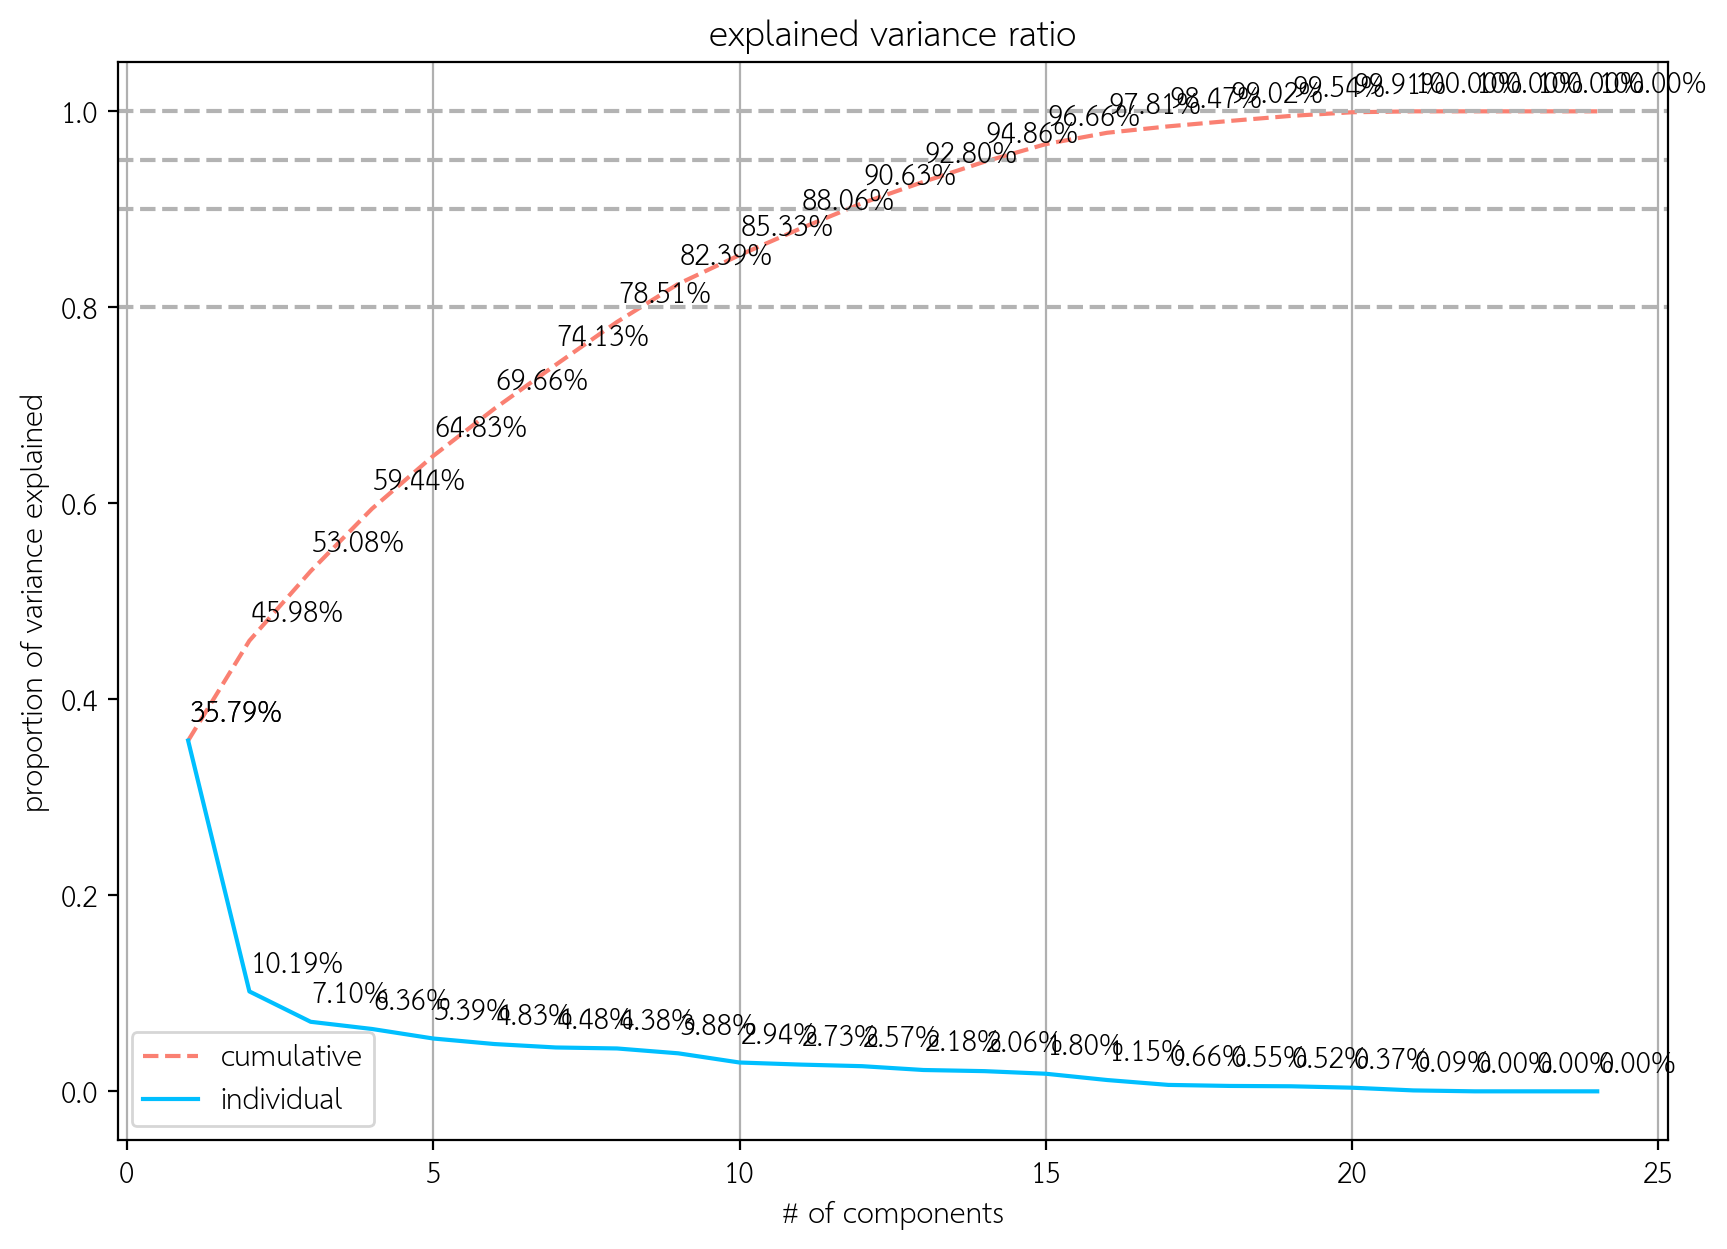

In [29]:
scree_plot(X, 24, True, True)

###PC1 อธิบาย var ได้ 35.79%
###PC1 PC2 อธิบาย var ได้ 45.98%
###PC1 PC2 PC3 อธิบาย var ได้ 52.08%
###PC1 PC2 PC3 PC4 อธิบาย var ได้ 59.44%
###PC1 PC2 PC3 PC4 PC5 อธิบาย var ได้ 64.83%
###PC1 PC2 PC3 PC4 PC5 PC6 อธิบาย var ได้ 69.66%
###PC1 PC2 PC3 PC4 PC5 PC6 PC7 อธิบาย var ได้ 74.13%
###PC1 PC2 PC3 PC4 PC5 PC6 PC7 PC8 อธิบาย var ได้ 78.51%
###PC1 PC2 PC3 PC4 PC5 PC6 PC7 PC8 PC9 อธิบาย var ได้ 82.39%

#PCA Loading

In [30]:
pca.components_ # Eigenvectors

array([[-1.44712882e-01,  1.44712882e-01,  1.80818362e-01,
        -4.10413067e-02,  3.05321473e-01,  2.36786393e-01,
        -5.28481444e-02,  2.76787657e-01,  4.45615422e-02,
         1.46046775e-02, -2.68802995e-01,  2.63099148e-01,
         3.14014569e-01, -3.14014569e-01,  2.78991954e-01,
         1.71933938e-01,  2.64189616e-02,  2.79950571e-01,
         2.77128213e-01, -1.28583569e-01,  1.06580843e-02,
         5.57772409e-02, -2.01549889e-01, -1.74668020e-01],
       [-3.87543297e-01,  3.87543297e-01,  1.56361841e-01,
         1.66156298e-01, -6.14595554e-02,  2.38420436e-01,
         2.00433076e-01, -1.15654962e-01, -3.88672397e-02,
        -6.05824050e-02, -1.27479133e-01,  2.04752089e-01,
         1.25837351e-01, -1.25837351e-01, -1.80856146e-01,
        -2.15884579e-01,  1.45085571e-01, -1.32956865e-01,
        -1.73431503e-01,  3.54359035e-01,  2.22120861e-01,
        -2.21291169e-01,  1.90408394e-01,  1.73530941e-01],
       [-4.25169533e-01,  4.25169533e-01, -1.62905305e

In [31]:
dpc=pd.DataFrame(pca.components_.T,
                  index=cols,
                  columns=[f'PC{n+1}' for n in range(pca.components_.shape[0])]).round(4) #Eigenvectors
# dpc
dpc.style.applymap(lambda e: 'background-color: yellow' if np.abs(e) > .5 else 'background-color: white')

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
เพศ_ชาย,-0.144700,-0.387500,-0.425200,0.071200,-0.043500,-0.055600,-0.113300,0.299200,0.081400,-0.133400,0.003600,-0.034500,0.066400,-0.034600,-0.029600,-0.012000,0.038800,0.032800,-0.024800,0.012700,0.008400,0.701400,-0.015700,-0.088400
เพศ_หญิง,0.144700,0.387500,0.425200,-0.071200,0.043500,0.055600,0.113300,-0.299200,-0.081400,0.133400,-0.003600,0.034500,-0.066400,0.034600,0.029600,0.012000,-0.038800,-0.032800,0.024800,-0.012700,-0.008400,0.701400,-0.015700,-0.088400
Age,0.180800,0.156400,-0.162900,-0.234200,-0.139800,-0.010300,-0.090500,0.295300,-0.088300,0.297700,-0.020600,0.519600,0.270700,0.202900,0.499800,0.000600,-0.028600,0.026900,0.107000,0.047200,-0.008700,-0.000000,-0.000000,-0.000000
BMI,-0.041000,0.166200,0.310700,0.008000,-0.267200,-0.283500,0.316300,0.430700,0.333600,-0.017500,0.056200,-0.189100,0.426000,0.174700,-0.232300,-0.112500,0.071400,-0.027600,-0.034000,0.021100,-0.008700,0.000000,0.000000,0.000000
Temp,0.305300,-0.061500,0.031200,0.010100,0.016000,0.012900,-0.034100,0.144200,-0.144900,0.009700,0.344800,-0.229000,-0.079400,0.055900,0.072400,-0.146700,-0.026500,0.029100,0.178900,-0.235200,0.749700,-0.000000,-0.000000,-0.000000
RH,0.236800,0.238400,-0.239900,-0.147400,0.059600,0.023300,0.065600,-0.080700,0.201200,-0.199700,-0.284000,0.172800,0.024200,-0.099200,-0.317400,0.123800,0.199000,0.282700,0.164800,0.459900,0.342600,0.000000,-0.000000,-0.000000
V,-0.052800,0.200400,-0.222100,0.226500,-0.218800,0.219400,-0.220500,-0.175600,0.533400,0.511800,0.199400,-0.092900,-0.001300,-0.214000,-0.011800,-0.170400,-0.046700,0.005400,-0.066900,0.036800,0.054500,-0.000000,-0.000000,-0.000000
TMRT,0.276800,-0.115700,0.126600,0.068800,-0.103400,0.029500,-0.105200,0.106100,-0.191100,0.024700,0.369200,-0.246500,-0.152900,0.080400,0.121500,-0.118000,0.147200,0.256300,-0.083000,0.624300,-0.280400,0.000000,0.000000,0.000000
พื้นที่ทำแบบสอบถาม_ภายนอก / ใต้ร่มไม้,0.044600,-0.038900,0.225900,-0.011700,0.305600,0.711100,-0.124700,0.278300,0.220500,-0.152100,-0.104700,-0.049400,0.121400,0.121400,0.037100,-0.017400,-0.016300,0.098800,0.003600,-0.066500,-0.060200,0.011900,0.343100,0.033200
พื้นที่ทำแบบสอบถาม_ภายนอก/ กลางแจ้ง,0.014600,-0.060600,-0.018800,0.447600,0.554700,-0.314400,0.203900,0.051100,0.035600,0.286700,0.106100,0.262600,-0.055800,0.102200,-0.096300,-0.067100,0.003200,0.043500,0.070100,0.080000,0.000800,0.012900,0.372700,0.036100


###ตัวแปรที่มี weight มากใน PC1 คือ ฤดูร้อนและหนาว
###ตัวแปรที่มี weight มากใน PC2 คือ เพศชายและหญิง
###ตัวแปรที่มี weight มากใน PC3 คือ เพศชายและหญิง
###ตัวแปรที่มี weight มากใน PC4 คือ กระแสลม
###ตัวแปรที่มี weight มากใน PC5 คือ พื้นที่ทำแบบสอบถาม_ภายนอก/ กลางแจ้ง
###ตัวแปรที่มี weight มากใน PC6 คือ พื้นที่ทำแบบสอบถาม_ภายนอก / ใต้ร่มไม้
###ตัวแปรที่มี weight มากใน PC7 คือ ความชื้น.1
###ตัวแปรที่มี weight มากใน PC8 คือ BMI
###ตัวแปรที่มี weight มากใน PC9 คือ ความเร็วลม

##TA

In [32]:
#plot PC1 and PC2
# pca = PCA(n_components=X.shape[1])
pca = PCA(n_components=2)

X_pca=pca.fit_transform(X_t)
print(f'explained_variance (n_components={pca.n_components}) = {pca.explained_variance_}')
print(f'explained_variance_ratio (n_components={pca.n_components}) = {pca.explained_variance_ratio_}')
print(f'sum explained_variance_ratio = {np.sum(pca.explained_variance_ratio_)}')

explained_variance (n_components=2) = [8.6341078  2.45908483]
explained_variance_ratio (n_components=2) = [0.35789048 0.10193098]
sum explained_variance_ratio = 0.45982145634224836


In [33]:
ta=pd.concat([pd.DataFrame(pca.transform(X_t),
                           columns=[f'PC{n}' for n in range(1, pca.n_components_ + 1)]),
              data[['Thermal_acceptance']]], axis = 'columns')
ta

,PC1,PC2,Thermal_acceptance
0,-1.746124,-0.980917,Accept
1,-1.559751,-0.290885,Accept
2,-2.140294,2.426802,Accept
3,-1.236050,-0.961665,Accept
4,-1.823214,-0.887687,Accept
...,...,...,...
188,3.131362,0.262816,Accept
189,3.845250,1.061473,Unaccept
190,3.933799,-1.954408,Accept
191,3.184923,0.386623,Accept


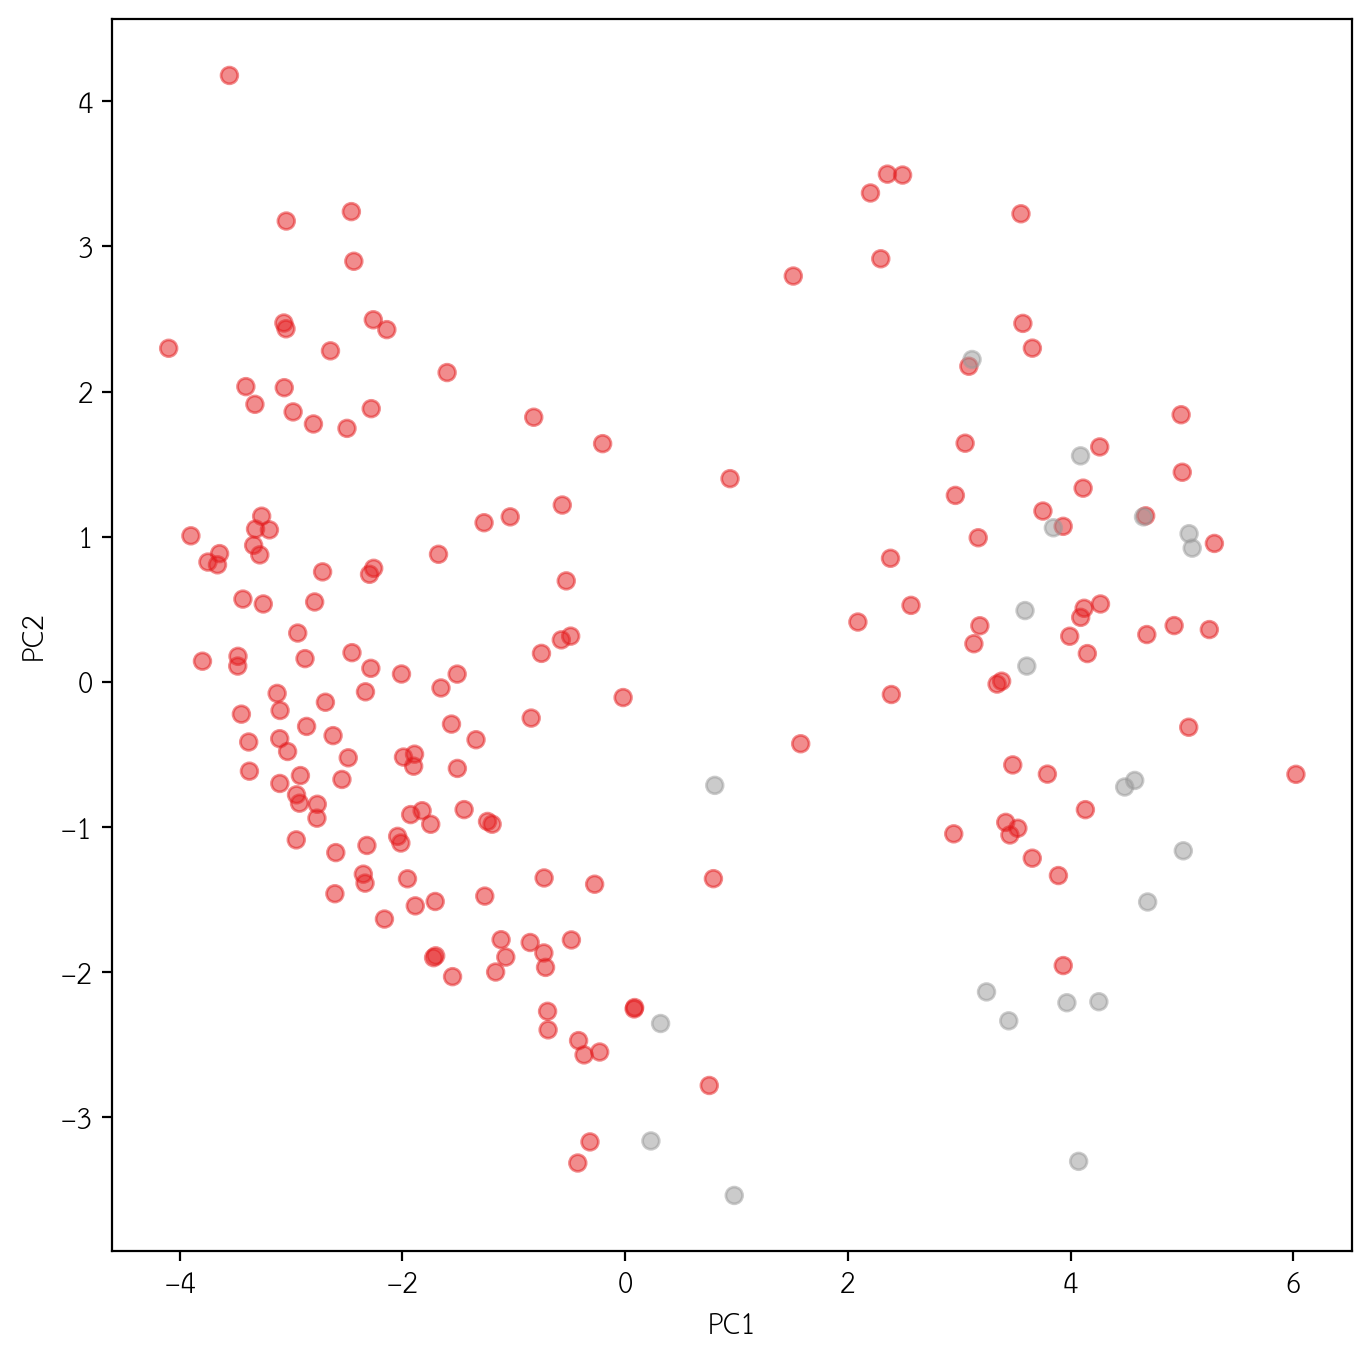

In [34]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.scatter(X_pca[:, 0], X_pca[:, 1], alpha=.5, cmap='Set1', c=data.Thermal_acceptance.astype('category').cat.codes)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2');

In [35]:
#3D Plot PC1 PC2 PC3
from mpl_toolkits.mplot3d import Axes3D

In [36]:
# pca = PCA(n_components=X.shape[1])
pca = PCA(n_components=3)

X_pca=pca.fit_transform(X_t)
print(f'explained_variance (n_components={pca.n_components}) = {pca.explained_variance_}')
print(f'explained_variance_ratio (n_components={pca.n_components}) = {pca.explained_variance_ratio_}')
print(f'sum explained_variance_ratio = {np.sum(pca.explained_variance_ratio_)}')

explained_variance (n_components=3) = [8.6341078  2.45908483 1.71204707]
explained_variance_ratio (n_components=3) = [0.35789048 0.10193098 0.07096568]
sum explained_variance_ratio = 0.530787138048068


In [37]:
 #switch to interactive matplotlib

#%matplotlib qt
#%pylab qt
# switch back to inline mode
#%matplotlib inline

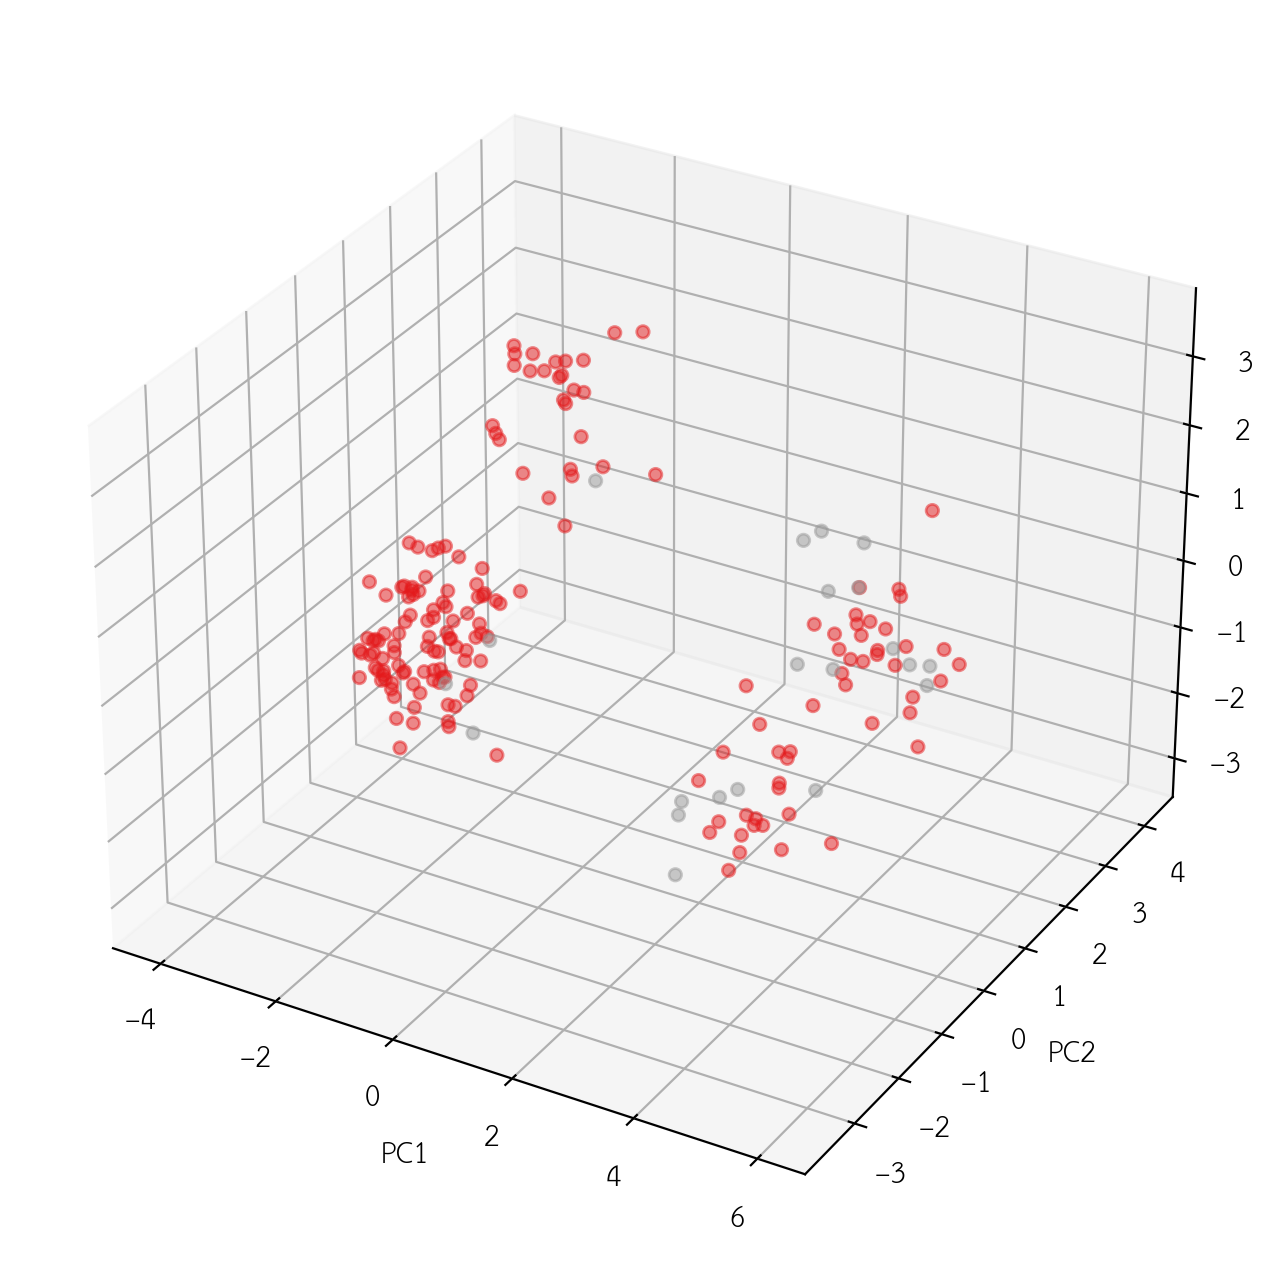

In [38]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], alpha=.5, cmap='Set1', c=data.Thermal_acceptance.astype('category').cat.codes)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3');

#TSV

In [39]:
# pca = PCA(n_components=X.shape[1])
pca = PCA(n_components=2)

X_pca=pca.fit_transform(X_t)
print(f'explained_variance (n_components={pca.n_components}) = {pca.explained_variance_}')
print(f'explained_variance_ratio (n_components={pca.n_components}) = {pca.explained_variance_ratio_}')
print(f'sum explained_variance_ratio = {np.sum(pca.explained_variance_ratio_)}')

explained_variance (n_components=2) = [8.6341078  2.45908483]
explained_variance_ratio (n_components=2) = [0.35789048 0.10193098]
sum explained_variance_ratio = 0.45982145634224836


In [40]:
tsv=pd.concat([pd.DataFrame(pca.transform(X_t),
                           columns=[f'PC{n}' for n in range(1, pca.n_components_ + 1)]),
              data[['Thermal_sensation_Vote']]], axis = 'columns')
tsv

,PC1,PC2,Thermal_sensation_Vote
0,-1.746124,-0.980917,0
1,-1.559751,-0.290885,-1
2,-2.140294,2.426802,-1
3,-1.236050,-0.961665,-1
4,-1.823214,-0.887687,-1
...,...,...,...
188,3.131362,0.262816,0
189,3.845250,1.061473,0
190,3.933799,-1.954408,1
191,3.184923,0.386623,1


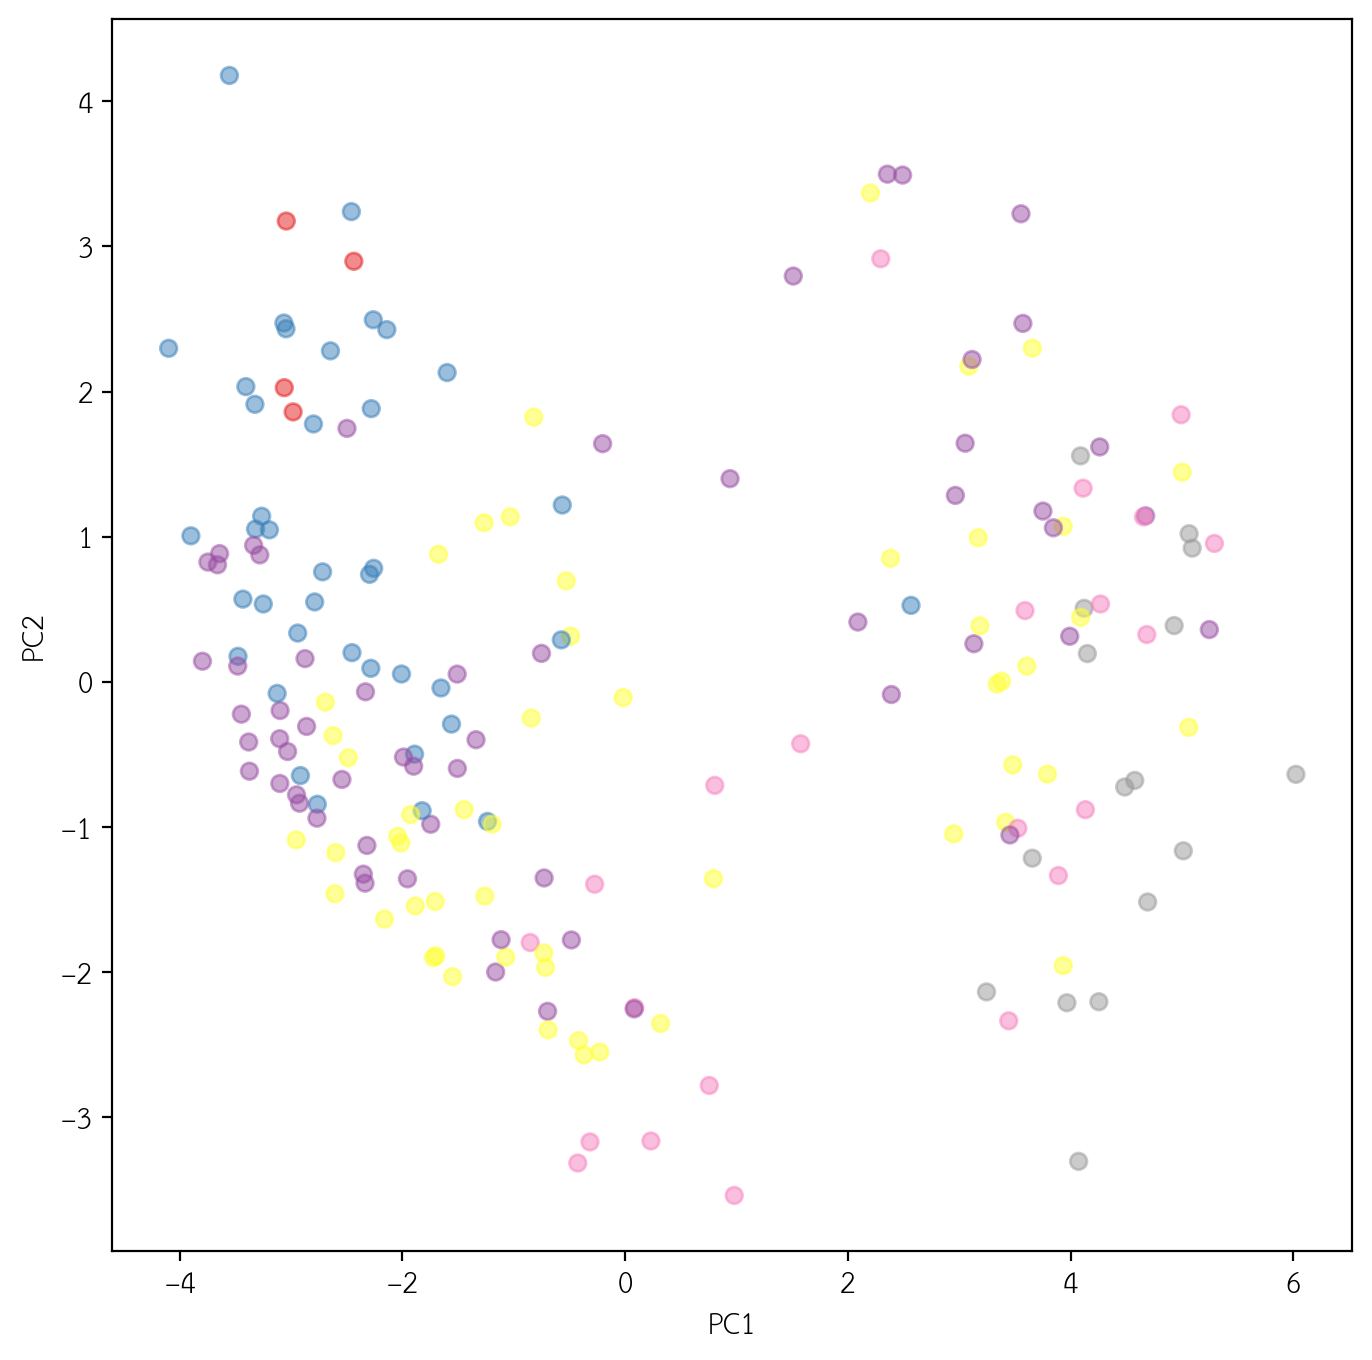

In [41]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.scatter(X_pca[:, 0], X_pca[:, 1], alpha=.5, cmap='Set1', c=data.Thermal_sensation_Vote.astype('category').cat.codes)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2');

In [42]:
# pca = PCA(n_components=X.shape[1])
pca = PCA(n_components=3)

X_pca=pca.fit_transform(X_t)
print(f'explained_variance (n_components={pca.n_components}) = {pca.explained_variance_}')
print(f'explained_variance_ratio (n_components={pca.n_components}) = {pca.explained_variance_ratio_}')
print(f'sum explained_variance_ratio = {np.sum(pca.explained_variance_ratio_)}')

explained_variance (n_components=3) = [8.6341078  2.45908483 1.71204707]
explained_variance_ratio (n_components=3) = [0.35789048 0.10193098 0.07096568]
sum explained_variance_ratio = 0.530787138048068


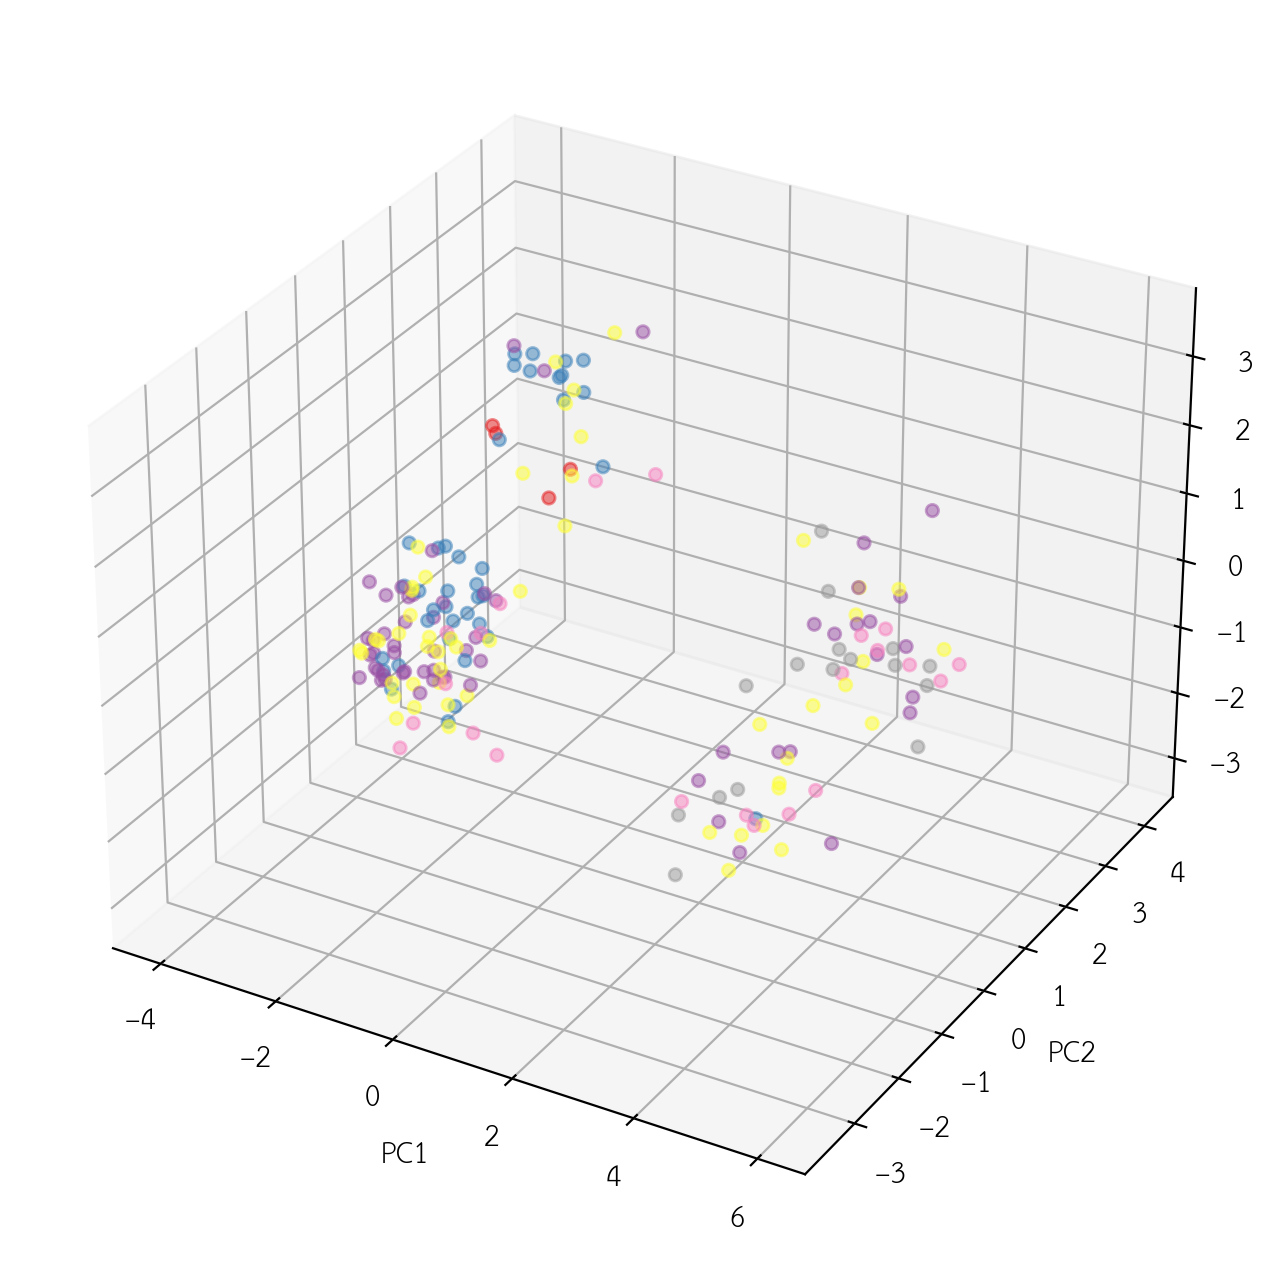

In [43]:
#3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], alpha=.5, cmap='Set1', c=data.Thermal_sensation_Vote.astype('category').cat.codes)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3');

#Biplot

In [46]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

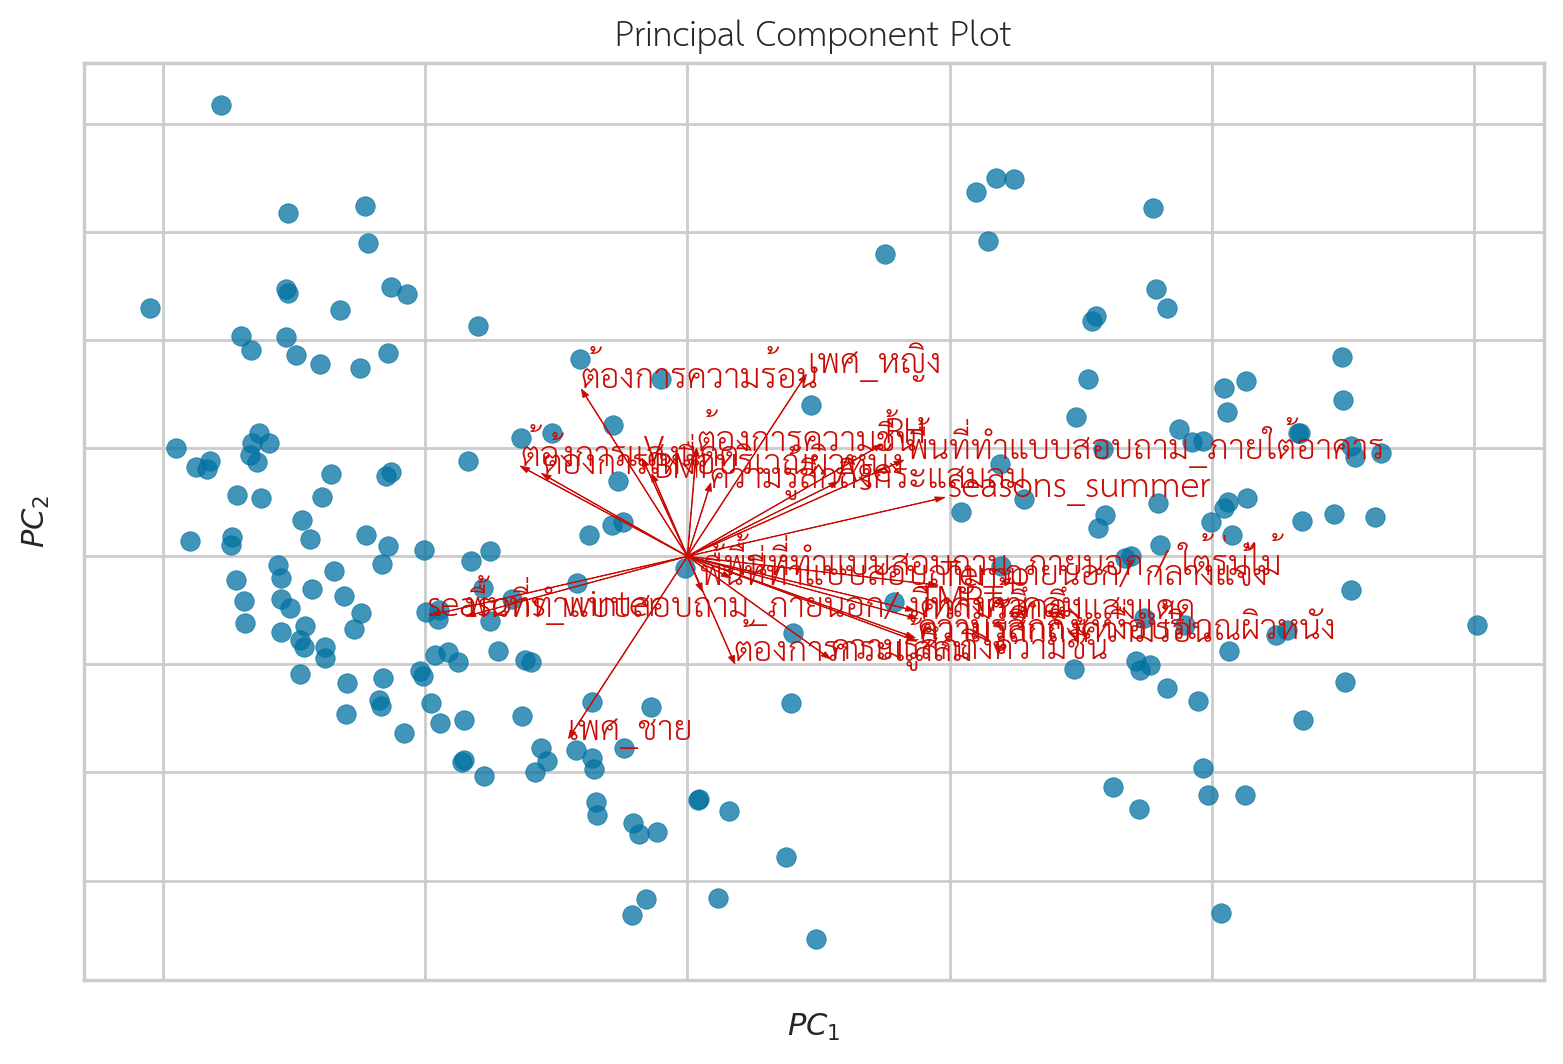

<Axes: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [47]:
# pip install yellowbrick
import yellowbrick.features as yb
visualizer = yb.PCA(scale=True, proj_features=True, proj_dim=2)
visualizer.fit_transform(X)
visualizer.show()

###PC1 มีตัวแปร เพศ temp tmrt ความรู้สึกถึงความร้อน ความรู้สึกเหงื่อบริเวณผิวหนัง ความรู้ถึงแสงแดด ความต้องการแสงแดด ต้องการเหงื่อบริเวณผิวหนัง ฤดูกาล
###PC2 มีตัวแปร ต้องการกระแสลม ความต้องการความร้อน ความเร็วลม ต้องการความชื้น รู้สึกถึงกระแสลม  ต้องการกระแสลม พื้นที่ทำแบบสอบถาม ความชื้นสัมพัท bmi อายุ

In [48]:
#pca = PCA(n_components=X_train_sc.shape[1])
pca = PCA(n_components=2)

pca.fit_transform(X_t)
print(f'explained_variance (n_components={pca.n_components}) = {pca.explained_variance_}') # Eigenvalues
print(f'explained_variance_ratio (n_components={pca.n_components}) = {pca.explained_variance_ratio_}')
print(f'sum explained_variance_ratio = {np.sum(pca.explained_variance_ratio_)}')

explained_variance (n_components=2) = [8.6341078  2.45908483]
explained_variance_ratio (n_components=2) = [0.35789048 0.10193098]
sum explained_variance_ratio = 0.45982145634224836


In [49]:
dpc=pd.DataFrame(pca.components_.T,
                  index=cols,
                  columns=[f'PC{n+1}' for n in range(pca.components_.shape[0])]).round(4) #Eigenvectors
# dpc
dpc.style.applymap(lambda e: 'background-color: yellow' if np.abs(e) > .5 else 'background-color: white')

,PC1,PC2
เพศ_ชาย,-0.144700,-0.387500
เพศ_หญิง,0.144700,0.387500
Age,0.180800,0.156400
BMI,-0.041000,0.166200
Temp,0.305300,-0.061500
RH,0.236800,0.238400
V,-0.052800,0.200400
TMRT,0.276800,-0.115700
พื้นที่ทำแบบสอบถาม_ภายนอก / ใต้ร่มไม้,0.044600,-0.038900
พื้นที่ทำแบบสอบถาม_ภายนอก/ กลางแจ้ง,0.014600,-0.060600
